# Working on Anime Dataset

## Load Packages

In [21]:
import pandas as pd
import numpy as np
from scipy.stats import norm
from scipy import stats
from scipy.stats import ttest_ind

import matplotlib.pyplot as plt
import seaborn as sns

## Load data

In [2]:
Anime_Data = pd.read_csv("anime.csv")
Anime_Data.head()

anime_id                title              title_english title_japanese  \
0     11013        Inu x Boku SS  Inu X Boku Secret Service         妖狐×僕SS   
1      2104     Seto no Hanayome      My Bride is a Mermaid          瀬戸の花嫁   
2      5262   Shugo Chara!! Doki         Shugo Chara!! Doki    しゅごキャラ！！どきっ   
3       721        Princess Tutu              Princess Tutu      プリンセスチュチュ   
4     12365  Bakuman. 3rd Season                   Bakuman.          バクマン。   

                                  title_synonyms  \
0                                Youko x Boku SS   
1                           The Inland Sea Bride   
2  Shugo Chara Ninenme, Shugo Chara! Second Year   
3                                            NaN   
4                               Bakuman Season 3   

                                           image_url type    source  episodes  \
0  https://myanimelist.cdn-dena.com/images/anime/...   TV     Manga        12   
1  https://myanimelist.cdn-dena.com/images/anime/...   TV     Manga        26   
2  https://myanimelist.cdn-dena.com/images/anime/...   TV     Manga        51   
3  https://myanimelist.cdn-dena.com/images/anime/...   TV  Original        38   
4  https://myanimelist.cdn-dena.com/images/anime/...   TV     Manga        25   

            status  ...           broadcast  \
0  Finished Airing  ...  Fridays at Unknown   
1  Finished Airing  ...             Unknown   
2  Finished Airing  ...             Unknown   
3  Finished Airing  ...  Fridays at Unknown   
4  Finished Airing  ...             Unknown   

                                             related  \
0  {'Adaptation': [{'mal_id': 17207, 'type': 'man...   
1  {'Adaptation': [{'mal_id': 759, 'type': 'manga...   
2  {'Adaptation': [{'mal_id': 101, 'type': 'manga...   
3  {'Adaptation': [{'mal_id': 1581, 'type': 'mang...   
4  {'Adaptation': [{'mal_id': 9711, 'type': 'mang...   

                                            producer          licensor  \
0  Aniplex, Square Enix, Mainichi Broadcasting Sy...  Sentai Filmworks   
1                  TV Tokyo, AIC, Square Enix, Sotsu        Funimation   
2                                    TV Tokyo, Sotsu               NaN   
3                 Memory-Tech, GANSIS, Marvelous AQL         ADV Films   
4                                      NHK, Shueisha               NaN   

             studio                                     genre  \
0  David Production    Comedy, Supernatural, Romance, Shounen   
1             Gonzo  Comedy, Parody, Romance, School, Shounen   
2         Satelight             Comedy, Magic, School, Shoujo   
3    Hal Film Maker    Comedy, Drama, Magic, Romance, Fantasy   
4         J.C.Staff           Comedy, Drama, Romance, Shounen   

                                       opening_theme  \
0                              ['"Nirvana" by MUCC']   
1                 ['"Romantic summer" by SUN&LUNAR']   
2  ['#1: "Minna no Tamago (みんなのたまご)" by Shugo Cha...   
3             ['"Morning Grace" by Ritsuko Okazaki']   
4  ['#1: "Moshimo no Hanashi (もしもの話)" by nano.RIP...   

                                        ending_theme  duration_min  \
0  ['#1: "Nirvana" by MUCC (eps 1, 11-12)', '#2: ...          24.0   
1  ['#1: "Ashita e no Hikari (明日への光)" by Asuka Hi...          24.0   
2  ['#1: "Rottara Rottara (ロッタラ ロッタラ)" by Buono! ...          24.0   
3  ['"Watashi No Ai Wa Chiisaikeredo" by Ritsuko ...          16.0   
4  ['#1: "Pride on Everyday" by Sphere (eps 1-13)...          24.0   

   aired_from_year  
0             2012  
1             2007  
2             2008  
3             2002  
4             2012  

[5 rows x 33 columns]

In [4]:
list(Anime_Data.columns)

['anime_id',
 'title',
 'title_english',
 'title_japanese',
 'title_synonyms',
 'image_url',
 'type',
 'source',
 'episodes',
 'status',
 'airing',
 'aired_string',
 'aired',
 'duration',
 'rating',
 'score',
 'scored_by',
 'rank',
 'popularity',
 'members',
 'favorites',
 'background',
 'premiered',
 'broadcast',
 'related',
 'producer',
 'licensor',
 'studio',
 'genre',
 'opening_theme',
 'ending_theme',
 'duration_min',
 'aired_from_year']

# PART 1. Is a Rating Score of 6.2 Different from the Mean in this Dataset? 

In [5]:
# Using Single Sample t-test, we'll first check for Normal Distribution and 
# how much difference is between the score of 6.2 and the mean.

## Create a Histogram to see if normal distribution

<AxesSubplot:>

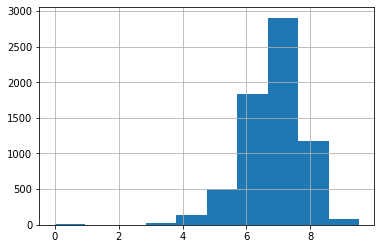

In [6]:
Anime_Data['score'].hist()

In [7]:
# The historgram looks slightly normally distributed with
# The x-axis of a bar chart ranges from 0 to 10 in 5 units. 
# The y-axis axis ranges from 0 to 3000 in 6 units.
# The highest peak in the bar chart is just under the 6th unit on the y-axis.



## Doing the analysis

In [8]:
stats.ttest_1samp(Anime_Data['score'], 6.2)

Ttest_1sampResult(statistic=57.14153988539698, pvalue=0.0)

In [9]:
# Since the p-values < .05, it means the score of 6.2 is significantly different than the population mean.

In [10]:
# To test if it's unusually high or low, we need to find the population mean.

Anime_Data.score.mean()

6.848998200359928

In [11]:
# It means score of 6.2 is little less than population mean!! 

# Part 1 Answer : The average anime rating is higher than 6.2 and is 6.85

# PART 2. Does Anime that is Still Airing Differ in Popularity from Anime that is No Longer Airing? 

In [12]:
# Using Independent t-test for this,  we'll check for Normality and then do the analysis.

In [14]:
Anime_Data.status.value_counts()

Finished Airing     6485
Currently Airing     183
Name: status, dtype: int64

## Test Assumptions 


<AxesSubplot:>

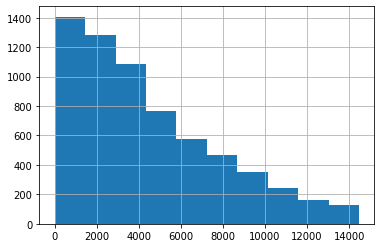

In [15]:

# The only assumption that independent t has is normality.
# We will need to test normality for each of your groups - Anime that's Airing and Anime that's not Airing.  

# 1. Anime that's No Longer Airing

Anime_Data.popularity[Anime_Data.status == 'Finished Airing'].hist()


In [16]:
# Here is the result: 

# The x-axis of a bar chart ranges from 0 to 14000 in 7 units. 
# The y-axis axis ranges from 0 to 1400 in 7 units. The highest peak in the bar chart 
# touches the 7 units on the y-axis.

<AxesSubplot:>

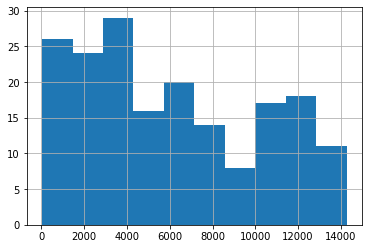

In [17]:
# 2. Anime that's Currently Airing

Anime_Data.popularity[Anime_Data.status == 'Currently Airing'].hist()

In [18]:
# Here is the result: 

# The x-axis of a bar chart ranges from 0 to 14000 in 7 units. 
# The y-axis axis ranges from 0 to 30 in 6 units. The highest peak in the bar chart 
# is just under the 7th units on the y-axis.

In [19]:
# It  looks like neither of these are bell-shaped, and are thus not normal.

###  Run the analysis

In [22]:
ttest_ind(Anime_Data.popularity[Anime_Data.status == 'Currently Airing'], Anime_Data.popularity[Anime_Data.status == 'Finished Airing'])


Ttest_indResult(statistic=6.489071311277514, pvalue=9.256789141747445e-11)

In [23]:
# Looks like there is significant difference between the popularity betwenn the Anime that's Airing and 
# the Anime that's no longer Airing, since the p-value is less than .05.

# The t-value is also not very small, which is another good indication.



### Let's examine the Means for Each Group to Determine Where the Significant Differences Lie



In [24]:
Anime_Data.popularity[Anime_Data.status == 'Currently Airing'].mean()

6108.131147540984

In [25]:
Anime_Data.popularity[Anime_Data.status == 'Finished Airing'].mean()

4433.558057054742

In [26]:
# This shows that the Anime that is currently airing is way more popular than the Anime that's ended Airing.

# Part 2 Answer: The Anime that is currently airing is way more popular than the Anime that's ended Airing.

# PART 3. Does the Source of the Anime Influence the Type of Anime?

In [27]:
# Use the variable - source , recoded to have four levels: 
# * Manga
# * Book
# * Game
# * Listening

# And use the variable - type.

In [28]:
# We will use Independent Chi-Square,
# An independent Chi-Square is used when you want to determine whether two categorical 
# variables influence each other.  


In [30]:
Anime_Data.source.view()
Anime_Data.type.view()

0        TV
1        TV
2        TV
3        TV
4        TV
       ... 
6663    OVA
6664    ONA
6665    OVA
6666    ONA
6667    OVA
Name: type, Length: 6668, dtype: object

In [31]:
Anime_Data.type.value_counts()

TV         2980
OVA        1345
Special     929
Movie       908
ONA         408
Music        98
Name: type, dtype: int64

In [32]:
Anime_Data.source.value_counts()

Manga            2493
Original         1789
Light novel       512
Visual novel      482
Game              424
Novel             282
4-koma manga      194
Other             170
Web manga         111
Music              55
Picture book       53
Card game          46
Book               45
Digital manga       7
Radio               5
Name: source, dtype: int64

In [34]:
# Recode the source variable into manga, book, listening, game.

def my_source(source_val):
    if source_val == "Manga": 
        return "Manga"
    if source_val == "Original": 
        return "Other"
    if source_val == "Light novel": 
        return "Book"
    if source_val == "Visual novel": 
        return "Book"
    if source_val == "Game": 
        return "Game"
    if source_val == "Novel": 
        return "Book"
    if source_val == "4-koma manga" :
        return "Manga"
    if source_val == "Other": 
        return "Other"
    if source_val == "Web Manga": 
        return "Manga"
    if source_val == "Music": 
        return "Listening"
    if source_val == "Picture book": 
        return "Book"
    if source_val == "Card game": 
        return "Game"
    if source_val == "Book": 
        return "Book"
    if source_val == "Digital manga": 
        return "Manga"
    if source_val == "Radio": 
        return "Listening"
    
    
Anime_Data['sourceR'] = Anime_Data['source'].apply(my_source)


In [36]:
Anime_Data.sourceR.view()

0       Manga
1       Manga
2       Manga
3       Other
4       Manga
        ...  
6663    Other
6664    Other
6665    Other
6666     Book
6667    Other
Name: sourceR, Length: 6668, dtype: object

## Test Assumption and run the analysis

### Create a Contingency Table

In [37]:
# Create with crosstab() using the two variables we need to see if Source of the Anime Influence the Type of Anime? :

Anime_Data_crosstab = pd.crosstab(Anime_Data['sourceR'], Anime_Data['type'])
Anime_Data_crosstab

type       Movie  Music  ONA  OVA  Special    TV
sourceR                                         
Book         163      2   62  389      174   584
Game          83      9   39   57       72   210
Listening      2     42    0    1        1    14
Manga        333     12   93  609      376  1271
Other        325     33  185  283      289   844

In [38]:
# for eg: It shows 163 books were made into movies.

## Running the Independent Chi-Square


In [39]:
stats.chi2_contingency(Anime_Data_crosstab)

(2164.1608183289673,
 0.0,
 20,
 array([[1.89849626e+02, 2.05356108e+01, 7.94183316e+01, 2.80583499e+02,
         1.91106909e+02, 6.12506024e+02],
        [6.49412841e+01, 7.02455391e+00, 2.71663871e+01, 9.59783438e+01,
         6.53713589e+01, 2.09518072e+02],
        [8.29037670e+00, 8.96751563e-01, 3.46804941e+00, 1.22525545e+01,
         8.34527985e+00, 2.67469880e+01],
        [3.72237914e+02, 4.02641452e+01, 1.55715419e+02, 5.50139698e+02,
         3.74703065e+02, 1.20093976e+03],
        [2.70680799e+02, 2.92789385e+01, 1.13231813e+02, 4.00045905e+02,
         2.72473387e+02, 8.73289157e+02]]))

In [40]:
# The first value is our Chi-Square statistic, 2164.16 in this case.
# The second value is our p value associated with that Chi-Square statistic which is less than .05 here. 
# Looking at this, it looks like there is a significant relationship between Source of the Anime Influence the Type. of Anime. 
# The source of the Anime does Influence the Type of Anime.

### Test the Assumption of 5 Cases per Expected Cell

In [41]:
# Since all of these values are over 5 in the above array, this means that the assumption has been met.

# Part 3 Answer: Yes, the source of the Anime does Influence the Type of Anime.

# PART 4.  How do the Variables about Popularity / Ranking Relate to Each Other? 

In [42]:
# Use the following variables: 

# score
# scored_by
# rank
# popularity
# members
# favorites

In [43]:
# We'll be checking the correlation between the above variables.

###  Creating new data set with just above variables.

In [44]:
Anime_Data_Cor = Anime_Data[['score', 'scored_by', 'rank', 'popularity', 'members', 'favorites']]

In [45]:
Anime_Data_Cor.head()

score  scored_by    rank  popularity  members  favorites
0   7.63     139250  1274.0         231   283882       2809
1   7.89      91206   727.0         366   204003       2579
2   7.55      37129  1508.0        1173    70127        802
3   8.21      36501   307.0         916    93312       3344
4   8.67     107767    50.0         426   182765       2082

In [46]:
# Dropping any null values

Anime_Data_Cor.dropna()

score  scored_by     rank  popularity  members  favorites
0      7.63     139250   1274.0         231   283882       2809
1      7.89      91206    727.0         366   204003       2579
2      7.55      37129   1508.0        1173    70127        802
3      8.21      36501    307.0         916    93312       3344
4      8.67     107767     50.0         426   182765       2082
...     ...        ...      ...         ...      ...        ...
6662   7.53         17  11126.0       12779      126          0
6664   0.00          0  12719.0       10168      384          1
6665   4.20          5  10253.0       14257       37          0
6666   4.57          7  11396.0       14066       49          1
6667   7.00          4  11396.0       14191       40          0

[6312 rows x 6 columns]

###  Individual Correlation between popularity and rank

In [47]:
Anime_Data_Cor['popularity'].corr(Anime_Data_Cor['rank'])

0.7773024303272644

In [48]:
# The value of .78 shows that Anime popularity and rank are strongly correlated.

### Correlation for the whole data by creating correlation matrix

In [49]:
Anime_Data_Cor.corr(method = "pearson")

score  scored_by      rank  popularity   members  favorites
score       1.000000   0.381926 -0.898747   -0.688492  0.415626   0.256094
scored_by   0.381926   1.000000 -0.356686   -0.425719  0.987107   0.793949
rank       -0.898747  -0.356686  1.000000    0.777302 -0.391524  -0.208503
popularity -0.688492  -0.425719  0.777302    1.000000 -0.474798  -0.210745
members     0.415626   0.987107 -0.391524   -0.474798  1.000000   0.781565
favorites   0.256094   0.793949 -0.208503   -0.210745  0.781565   1.000000

### Graphic presentation using matplotlib

In [50]:
Anime_Data_Cor.corr(method='pearson').style.format("{:.2}").background_gradient(cmap=plt.get_cmap('coolwarm'), axis=1)

In [51]:
# The darker the red hues means the variables are strongly correlated; 
# increase in one variable value increases the other and vice versa.

# The darker the blue hues means the variables are strongly correlated; 
# increase in one variable value decreases the other and vice versa.

# They all look correlated to each other.
# Anime rank and popularity are well correlated to each other.
# While less correlated with other variables comparatively.


### Visual using sns heatmap

<AxesSubplot:>

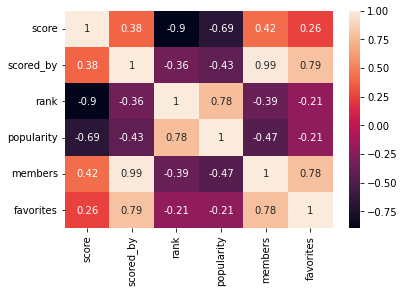

In [52]:
sns.heatmap(Anime_Data_Cor.corr(), annot=True)

# Part 4 Answer : Anime rank and popularity look well correlated to each other, while less correlated with other variables comparatively.

